In [36]:
# Importing necessary libraries
import numpy as np  # Mathematical calculations, extra faster functions
import pandas as pd # For data loading and manipulation
import matplotlib.pyplot as plt  # Visualization tool (Can create complex custom charts) 
import seaborn as sns # Visualization tool (in-build high quality charts)
import warnings
warnings.filterwarnings('ignore')  # This method will ignore all warnings.

In [11]:
df=pd.read_csv('Data.csv', sep = ';')

In [26]:
df.shape

(128, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             128 non-null    int64  
 1   Weeks                   128 non-null    int64  
 2   Contract_Renewal        128 non-null    object 
 3   Data_Plan               128 non-null    object 
 4   Data_Usage              128 non-null    float64
 5   Calls_To_Customer_Care  128 non-null    int64  
 6   DayMins                 128 non-null    float64
 7   DayCalls                128 non-null    int64  
 8   MonthlyCharge           128 non-null    float64
 9   OverageFee              128 non-null    float64
 10  RoamMins                128 non-null    float64
 11  Customer_Attrition      128 non-null    object 
dtypes: float64(5), int64(4), object(3)
memory usage: 12.1+ KB


In [28]:
df.head(5)

,Customer_ID,Weeks,Contract_Renewal,Data_Plan,Data_Usage,Calls_To_Customer_Care,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Customer_Attrition
0,1001,47,Yes,Yes,2.3,1,128.2,97,34.2,10.00,9.1,No
1,1002,30,Yes,No,0.0,2,210.5,105,55.3,15.50,0.0,Yes
2,1003,52,No,Yes,4.1,0,221.7,120,70.5,9.75,0.0,No
3,1004,25,Yes,No,0.0,4,183.6,97,52.7,17.00,10.0,Yes
4,1005,38,Yes,Yes,2.6,1,110.7,112,32.2,10.50,3.3,No


In [29]:
# use replace() to map "yes" to 1 and "no" to 0 in two columns
df["Contract_Renewal"] = df["Contract_Renewal"].replace({"Yes": 1, "No": 0})
df["Customer_Attrition"] = df["Customer_Attrition"].replace({"Yes": 1, "No": 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             128 non-null    int64  
 1   Weeks                   128 non-null    int64  
 2   Contract_Renewal        128 non-null    int64  
 3   Data_Plan               128 non-null    object 
 4   Data_Usage              128 non-null    float64
 5   Calls_To_Customer_Care  128 non-null    int64  
 6   DayMins                 128 non-null    float64
 7   DayCalls                128 non-null    int64  
 8   MonthlyCharge           128 non-null    float64
 9   OverageFee              128 non-null    float64
 10  RoamMins                128 non-null    float64
 11  Customer_Attrition      128 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 12.1+ KB


**1. What is the correlation between the number of calls to customer care and customer attrition?**

In [30]:

# Calculate correlation between customer care calls and attrition
correlation = df['Calls_To_Customer_Care'].corr(df['Customer_Attrition'])

print(f"The correlation between customer care calls and attrition is {correlation}")


The correlation between customer care calls and attrition is 0.15985209715799378


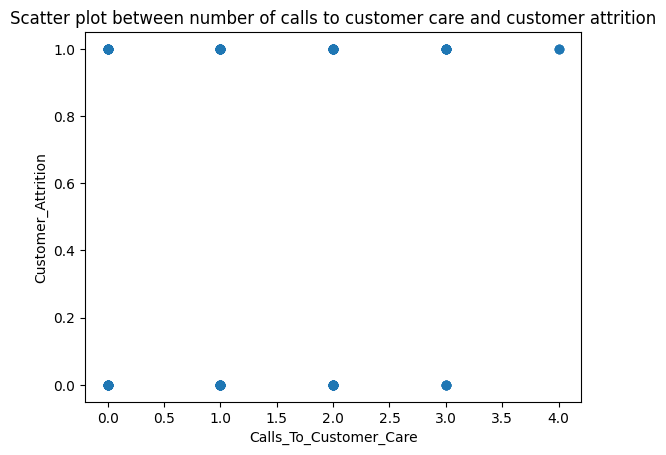

In [40]:
x = df['Calls_To_Customer_Care'] 
y = df['Customer_Attrition'] 
plt.scatter(x, y)
plt.xlabel('Calls_To_Customer_Care')  
plt.ylabel('Customer_Attrition')  
plt.title('Scatter plot between number of calls to customer care and customer attrition')
plt.show()

There is no correlation between number of calls to customer care and customer attrition

**2. Is there a relationship between customer attrition and contract renewal?**

In [38]:
correlation = df['Customer_Attrition'].corr(df['Contract_Renewal'])
print(correlation)

-0.14802701779121036


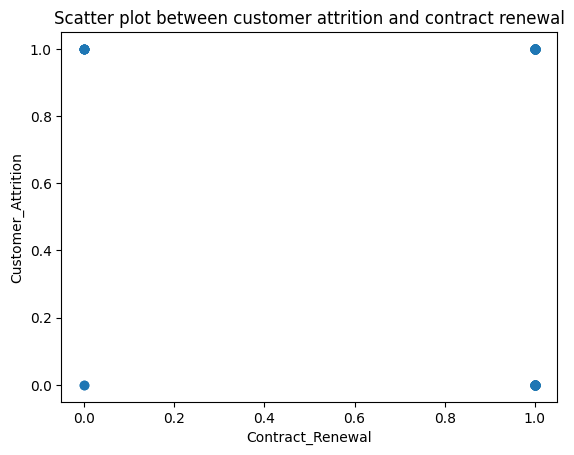

In [39]:
# scatter plot
x = df['Contract_Renewal'] 
y = df['Customer_Attrition'] 
plt.scatter(x, y)
plt.xlabel('Contract_Renewal')  
plt.ylabel('Customer_Attrition')  
plt.title('Scatter plot between customer attrition and contract renewal')
plt.show()

There is no relationship between customer attrition and contract renewal

**3. Which feature(s) have the highest correlation with customer attrition?**

In [37]:
df.corr()

,Customer_ID,Weeks,Contract_Renewal,Data_Usage,Calls_To_Customer_Care,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Customer_Attrition
Customer_ID,1.000000,0.566044,0.353464,0.247969,-0.026557,0.081528,-0.076162,0.237233,-0.243204,0.469565,-0.131085
Weeks,0.566044,1.000000,-0.005647,0.188703,-0.171920,-0.010050,-0.057790,0.035491,-0.055331,0.210051,-0.099801
Contract_Renewal,0.353464,-0.005647,1.000000,0.420052,0.006196,0.044614,0.000154,0.264581,-0.226855,0.581667,-0.148027
Data_Usage,0.247969,0.188703,0.420052,1.000000,-0.131452,0.202546,0.037289,0.501403,-0.300511,0.657529,-0.232578
Calls_To_Customer_Care,-0.026557,-0.171920,0.006196,-0.131452,1.000000,-0.088998,-0.088591,-0.034409,0.027417,0.054928,0.159852
DayMins,0.081528,-0.010050,0.044614,0.202546,-0.088998,1.000000,0.111095,0.766294,-0.155354,0.111403,0.034044
DayCalls,-0.076162,-0.057790,0.000154,0.037289,-0.088591,0.111095,1.000000,0.039543,-0.112276,-0.131543,-0.265794
MonthlyCharge,0.237233,0.035491,0.264581,0.501403,-0.034409,0.766294,0.039543,1.000000,-0.286852,0.427827,0.011720
OverageFee,-0.243204,-0.055331,-0.226855,-0.300511,0.027417,-0.155354,-0.112276,-0.286852,1.000000,-0.270259,0.225451
RoamMins,0.469565,0.210051,0.581667,0.657529,0.054928,0.111403,-0.131543,0.427827,-0.270259,1.000000,-0.038200


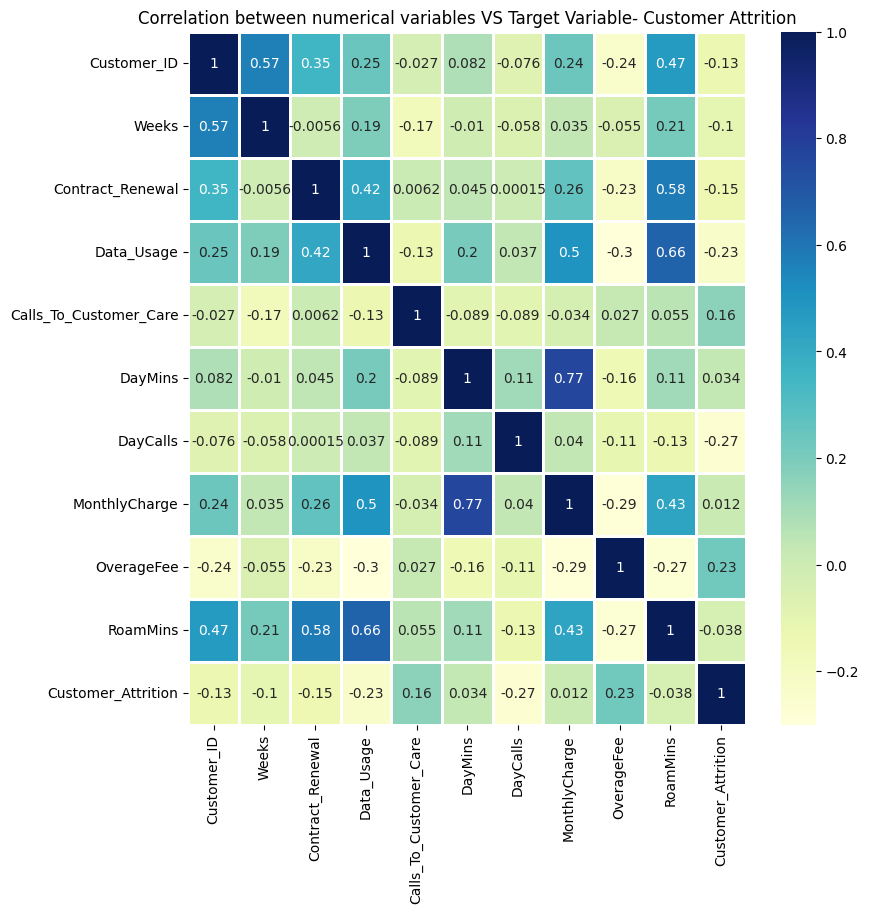

In [46]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,ax=ax, linewidth=0.8,cmap="YlGnBu")
plt.title("Correlation between numerical variables VS Target Variable- Customer Attrition")
plt.show()

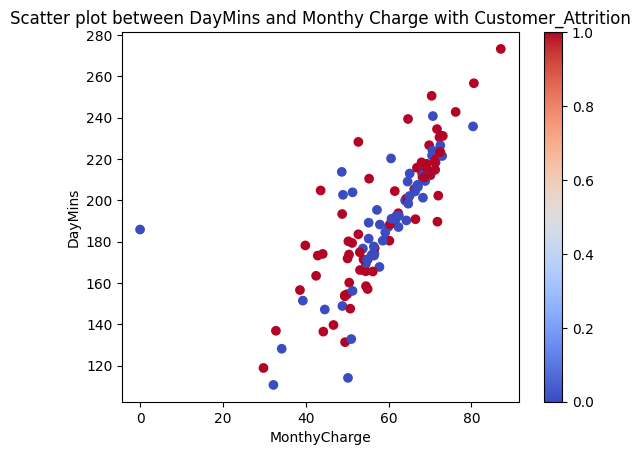

In [43]:
x = df['MonthlyCharge']
y = df['DayMins']
z = df['Customer_Attrition']

plt.scatter(x, y, c=z, cmap='coolwarm')
plt.colorbar()
plt.xlabel('MonthyCharge')
plt.ylabel('DayMins')
plt.title('Scatter plot between DayMins and Monthy Charge with Customer_Attrition')
plt.show()

As we can see that Monthy Charge and Daily Minutes have strong positive correlation together with Customer Atrrition which means that these two factors are impacting the attrition

We can able to increase customer retention by giving offers who are active customers 